In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
data = pd.read_csv('../data/earthquake.csv')
print(data)

      Latitude  Longitude  Depth  Magnitude
0        29.06      77.42    5.0        2.5
1        19.93      72.92    5.0        2.4
2        31.50      74.37   33.0        3.4
3        28.34      76.23    5.0        3.1
4        27.09      89.97   10.0        2.1
...        ...        ...    ...        ...
2714     12.30      94.80   10.0        4.8
2715     24.70      94.30   40.0        4.1
2716     22.50      88.10   10.0        3.6
2717     24.60      94.20   54.0        3.5
2718     14.50      92.90   10.0        4.6

[2719 rows x 4 columns]


In [2]:
data.head()

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1


In [3]:
data.tail()

,Latitude,Longitude,Depth,Magnitude
2714,12.3,94.8,10.0,4.8
2715,24.7,94.3,40.0,4.1
2716,22.5,88.1,10.0,3.6
2717,24.6,94.2,54.0,3.5
2718,14.5,92.9,10.0,4.6


In [4]:
data.isnull().sum()

Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

# Analyzing the Dataset

In [5]:
print(data.shape)

(2719, 4)


In [6]:
data.describe()

,Latitude,Longitude,Depth,Magnitude
count,2719.000000,2719.000000,2719.000000,2719.000000
mean,29.939433,80.905638,53.400478,3.772196
std,7.361564,10.139075,68.239737,0.768076
min,0.120000,60.300000,0.800000,1.500000
25%,25.700000,71.810000,10.000000,3.200000
50%,31.210000,76.610000,15.000000,3.900000
75%,36.390000,92.515000,82.000000,4.300000
max,40.000000,99.960000,471.000000,7.000000


In [7]:
data.info

<bound method DataFrame.info of       Latitude  Longitude  Depth  Magnitude
0        29.06      77.42    5.0        2.5
1        19.93      72.92    5.0        2.4
2        31.50      74.37   33.0        3.4
3        28.34      76.23    5.0        3.1
4        27.09      89.97   10.0        2.1
...        ...        ...    ...        ...
2714     12.30      94.80   10.0        4.8
2715     24.70      94.30   40.0        4.1
2716     22.50      88.10   10.0        3.6
2717     24.60      94.20   54.0        3.5
2718     14.50      92.90   10.0        4.6

[2719 rows x 4 columns]>

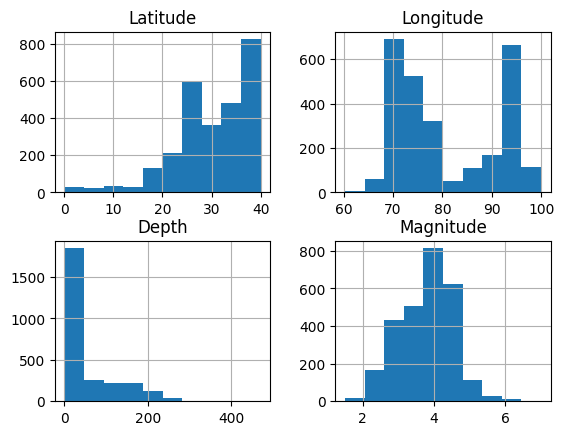

In [8]:
import matplotlib.pyplot as plt   

%matplotlib inline                   
c = data[['Latitude','Longitude','Depth','Magnitude']]
c.hist()
plt.show()

In [9]:
data = np.array(data)
print(data)
X = data[:, 0:-1]
y = data[:, -1]
y = y.astype('int')
X = X.astype('int')


[[29.06 77.42  5.    2.5 ]
 [19.93 72.92  5.    2.4 ]
 [31.5  74.37 33.    3.4 ]
 ...
 [22.5  88.1  10.    3.6 ]
 [24.6  94.2  54.    3.5 ]
 [14.5  92.9  10.    4.6 ]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print("X_train:")
print(X_train)

print("\ny_train:")
print(y_train)


X_train:
[[ 22  94  10]
 [ 27  75   5]
 [ 34  76  10]
 ...
 [ 31  76   5]
 [ 23  70  10]
 [ 37  72 125]]

y_train:
[4 2 2 ... 3 4 4]


In [12]:
# type casting.
y_train=y_train.astype('int')
y_train

array([4, 2, 2, ..., 3, 4, 4])

In [13]:
y_test=y_test.astype('int')
y_test

array([4, 2, 2, 3, 2, 4, 2, 5, 4, 3, 4, 3, 4, 2, 4, 2, 3, 4, 4, 3, 4, 4,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 2, 4, 4, 3, 2, 4, 4, 5, 2, 4, 5, 2, 4,
       2, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       3, 2, 4, 5, 3, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 3, 4,
       4, 4, 4, 2, 4, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 4, 5, 2, 3, 4, 4, 4,
       4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 2, 3, 3, 4, 3, 3, 4, 2, 4,
       4, 3, 3, 4, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 3, 4, 4, 3, 3, 2, 4, 3,
       5, 2, 4, 3, 3, 3, 4, 4, 2, 1, 2, 3, 6, 4, 4, 4, 2, 3, 4, 4, 3, 4,
       2, 3, 2, 4, 4, 3, 4, 4, 2, 4, 4, 4, 3, 2, 4, 3, 2, 2, 2, 4, 3, 4,
       6, 5, 2, 4, 3, 3, 3, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       4, 3, 4, 3, 4, 4, 2, 3, 3, 2, 3, 2, 4, 4, 3, 2, 4, 3, 4, 4, 2, 1,
       3, 3, 3, 4, 4, 2, 3, 4, 4, 3, 5, 4, 3, 4, 4, 4, 4, 2, 4, 1, 3, 3,
       2, 3, 3, 3, 2, 4, 3, 4, 4, 4, 4, 4, 2, 3, 4, 3, 3, 4, 3, 3, 4, 3,
       3, 4, 3, 4, 2, 4, 3, 2, 4, 4, 5, 3, 3, 3, 3,

## Using Prediction Algorithms:

### Liner regression to predict

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


data = pd.read_csv("../data/earthquake.csv")

data = np.array(data)
print(data)
X = data[:, 0:-1]
y = data[:, -1]
y = y.astype('int')
X = X.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[29.06 77.42  5.    2.5 ]
 [19.93 72.92  5.    2.4 ]
 [31.5  74.37 33.    3.4 ]
 ...
 [22.5  88.1  10.    3.6 ]
 [24.6  94.2  54.    3.5 ]
 [14.5  92.9  10.    4.6 ]]


In [15]:
#  print(X_train,y_train)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.5551470588235294


In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_dtc))


0.5588235294117647


In [17]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_svm))


0.48161764705882354


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_knn))


0.5238970588235294


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_gb))


0.5827205882352942


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# Evaluate models
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Model': names, 'Accuracy': scores})
print(result_df)

e:\final year projects\disaster\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Model  Accuracy
0   KNN  0.523897
1    LR  0.474265
2   SVC  0.481618
3    DT  0.558824
4    RF  0.569853
5    GB  0.580882


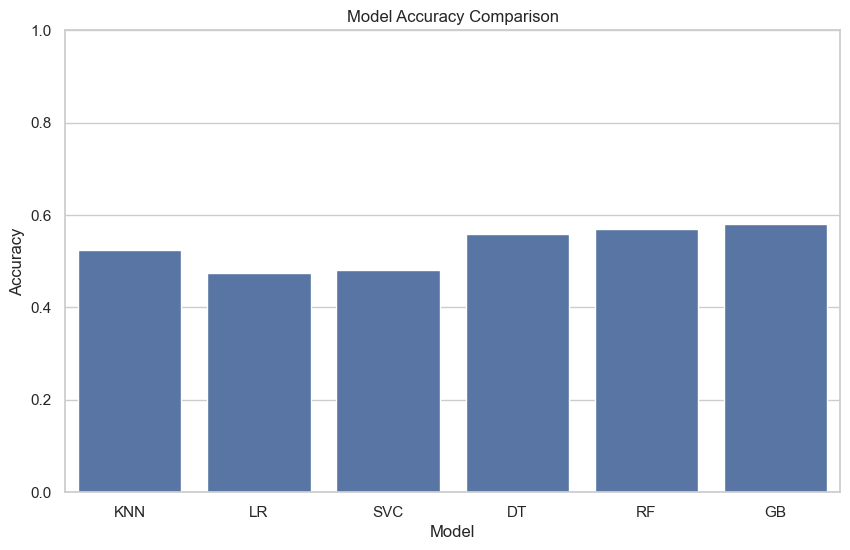

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the seaborn plot (optional)
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=result_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to be between 0 and 1 for accuracy percentage
plt.show()


In [ ]:
import pickle

# Trained models
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
svc_model = SVC()
dtc_model = DecisionTreeClassifier()
rmf_model = RandomForestClassifier()

# Fit models on the training data
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
dtc_model.fit(X_train, y_train)
rmf_model.fit(X_train, y_train)

# Save models to pickle file
with open('earthquake_models.pkl', 'wb') as file:
    pickle.dump({
        'KNN': knn_model,
        'LogisticRegression': lr_model,
        'SVC': svc_model,
        'DecisionTree': dtc_model,
        'RandomForest': rmf_model
    }, file)


e:\final year projects\disaster\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pickle

# Load models from pickle file
with open('earthquake_models.pkl', 'rb') as file:
    loaded_models = pickle.load(file)

# Access individual models
loaded_knn_model = loaded_models['KNN']
loaded_lr_model = loaded_models['LogisticRegression']
loaded_svc_model = loaded_models['SVC']
loaded_dtc_model = loaded_models['DecisionTree']
loaded_rmf_model = loaded_models['RandomForest']

# Now you can use these loaded models for predictions or further analysis
# For example:
x_new_data = np.array([27.9,94.2,10]).reshape(1, -1)  # Your new data for prediction

knn_predictions = loaded_knn_model.predict(x_new_data)
lr_predictions = loaded_lr_model.predict(x_new_data)
svc_predictions = loaded_svc_model.predict(x_new_data)
dtc_predictions = loaded_dtc_model.predict(x_new_data)
rmf_predictions = loaded_rmf_model.predict(x_new_data)

print(knn_predictions)
print(lr_predictions)
print(svc_predictions)
print(dtc_predictions)
print(rmf_predictions)


[3]
[3]
[3]
[2]
[3]
